<a href="https://colab.research.google.com/github/Josue-A84/IA/blob/main/2do_libro_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###**Curso: Inteligencia Artificial y Aprendizaje Automático**
####**Semillero IA**
#####**Prof Fausto Velasco**

###**Nombre del estudiante: (agrega aquí tu numbre completo)**



**NOTAS:**

*   El siguiente documento supone que ejecutarás el archivo con Google-Colab.
*   Se trabajará solamente con el archivo "california_housing_train.csv".
*   Si no trabajas con Google-Colab, deberás descargar el archivo y trabajarlo en la aplicación de tu preferencia.
*   Esta actividad consta solamente de 3 ejercicios, dividios en 3 partes.
*   **Solamente deberás modificar este archivo agregando tus líneas de código en las 3 partes que se te indican.**
*   **Cualquier modificación fuera de estas áreas te restará puntos a la actividad.**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [17]:
# Cargamos el archivo que está en la siguiente carpeta de Google-Colab:
DIR = "/content/sample_data/"
os.chdir(DIR)

misdatos = pd.read_csv("california_housing_train.csv", sep=",")
misdatos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#**Ejercicio - 1: Matriz de Correlación de Pearson**

INSTRUCCIONES:

En este ejercicio debes solamente desplegar la matriz de correlación de las variables del dataframe "misdatos", incluyendo en cada celda de la matriz el valor numérico de la correlación entre cada par variables.

Al desplegar la matriz de correlación deberás además usar la opción del mapa de calor (heatmap) de la librería seaborn, usando el mapa de color 'BuGn'.

Puedes consultar la siguiente documentación:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://matplotlib.org/stable/tutorials/colors/colormaps.html


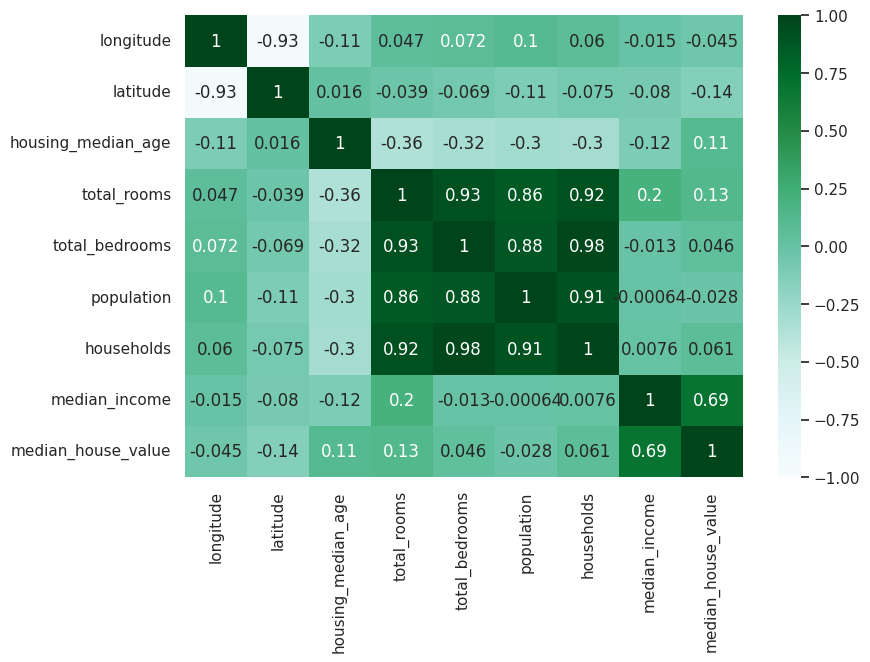

In [18]:
sns.set(rc={'figure.figsize':(9,6)})

#########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
# Ejercicio 1
# Sustituye "None" por tus líneas de código dentro de esta región.
# Se esperan cuando mucho 2 líneas de código.

correlation_mx = misdatos.corr(method='pearson')
hm = sns.heatmap(correlation_mx, annot= True, cmap='BuGn', vmin=-1, vmax=1  )


# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################

plt.show()

Yo creo que las variables que estan relacionadas positivamente serian:
*median_house_value con media_income
*households con  total_bedrooms

los que menos:
*latitude con longitud  
*total_rooms con housing_median_age


y yo creo que para sacar un buen estimado de precio seria:
*total_rooms
*total_bedrooms
*population
*households



#**Ejercicio - 2: Transformaciones e Hisotgramas de variables**

INSTRUCCIONES:

En este ejercicio se trabajará solamente con las siguientes 7 variables:

*   housing_median_age
*   total_rooms
*   total_bedrooms
*   population
*   households
*   median_income
*   median_house_value

A cada una de dichas columnas les deberás aplicar las siguientes transformaciones y desplegar sus histogramas con 20 barras (bins):

*   Raíz cuadrada con Numpy.
*   Logaritmo natural con Numpy.
*   Potencia 2 (i.e., elevar al cuadrado) con Numpy.
*   Box-Cox con scikit-learn.


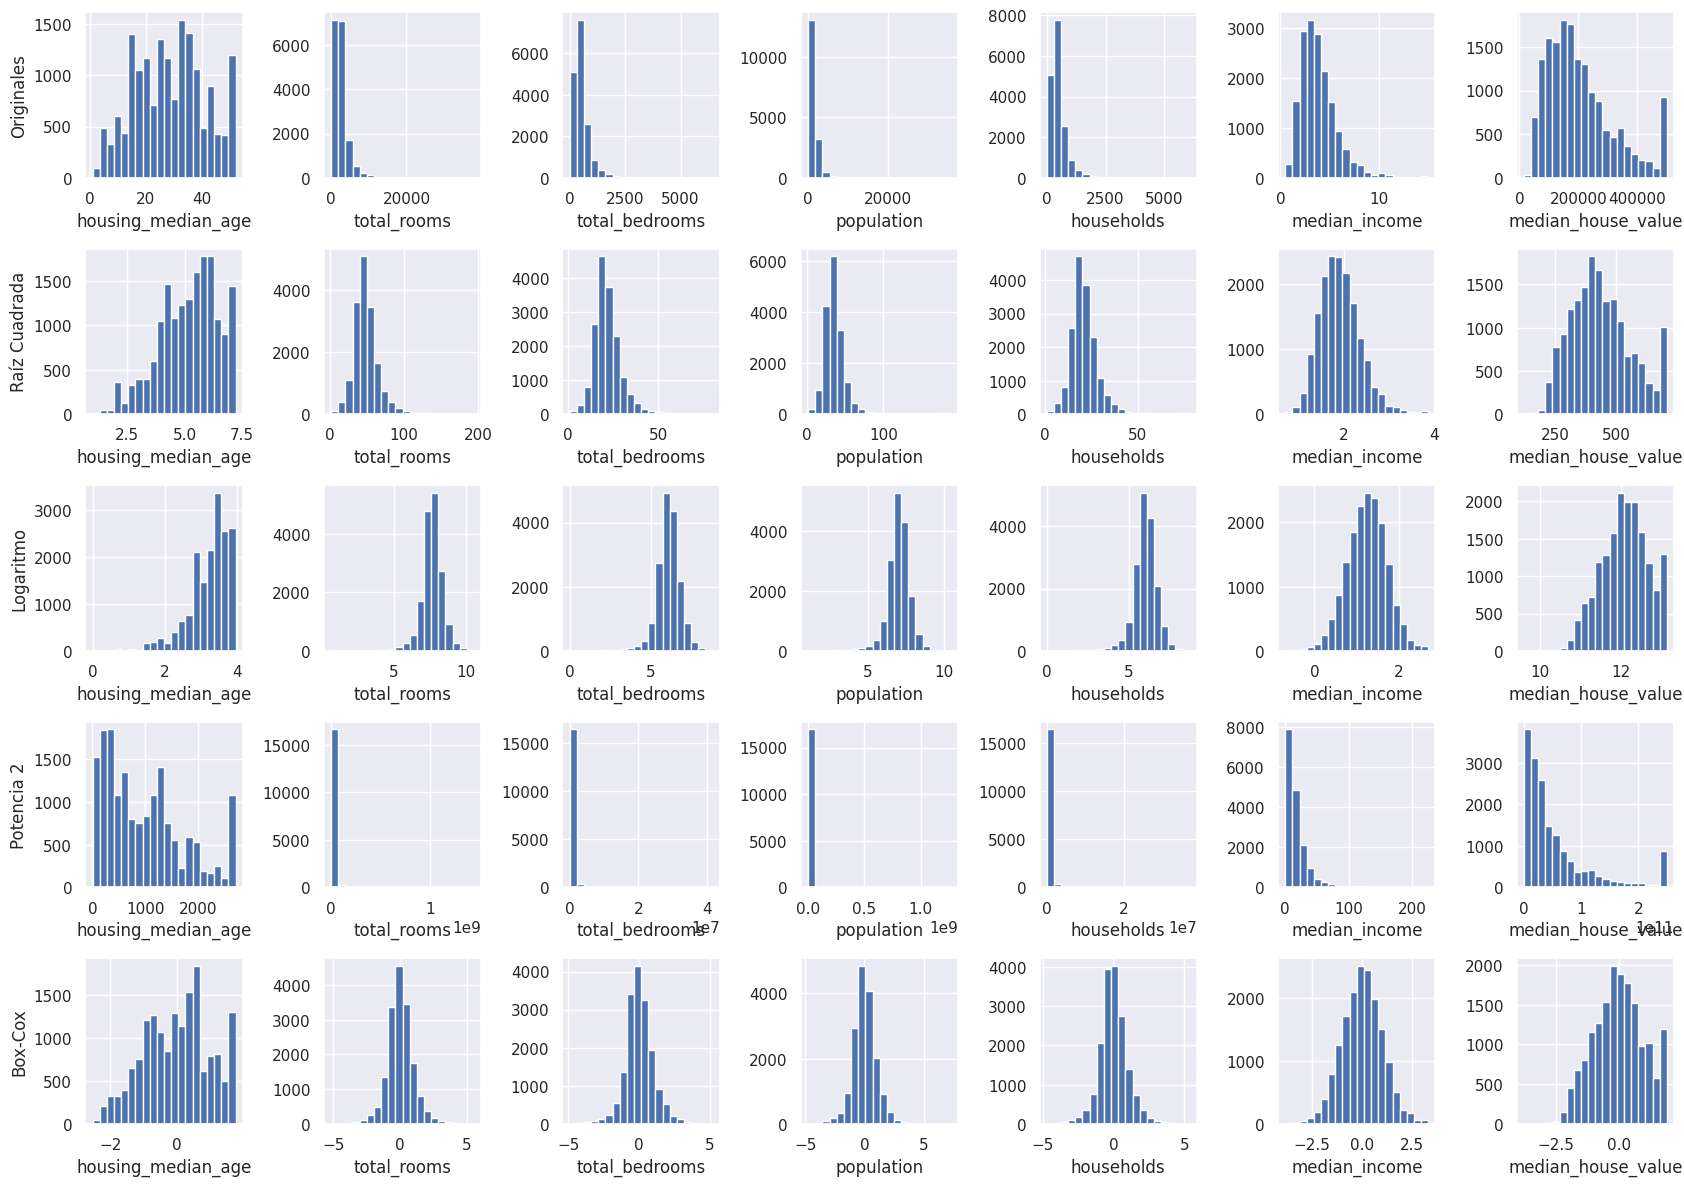

In [25]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import power_transform

# Lista de las 7 variables
variables_a_transformar = [
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

sns.set(rc={'figure.figsize': (17, 12)})
fig, axes = plt.subplots(5, 7)
plt.subplots_adjust(hspace=0.5)

for k in range(7):
    # Datos originales
    plt.subplot(5, 7, k + 1)
    Transf0 = misdatos[variables_a_transformar[k]]
    plt.hist(Transf0, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Originales')

    # Transformación: raíz cuadrada
    plt.subplot(5, 7, k + 8)
    Transf1 = np.sqrt(Transf0)
    plt.hist(Transf1, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Raíz Cuadrada')

    # Transformación: logaritmo natural (evita valores <= 0)
    plt.subplot(5, 7, k + 15)
    Transf2 = np.log(Transf0 + 1e-9) if (Transf0 <= 0).any() else np.log(Transf0)
    plt.hist(Transf2, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Logaritmo')

    # Transformación: potencia de 2
    plt.subplot(5, 7, k + 22)
    Transf3 = np.power(Transf0, 2)
    plt.hist(Transf3, bins=20)
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Potencia 2')

    # Transformación: Box-Cox (requiere valores > 0)
    plt.subplot(5, 7, k + 29)
    var = Transf0[Transf0 > 0]  # Elimina ceros o negativos
    if len(var) == len(Transf0):  # Solo si todos son > 0
        Transf4 = power_transform(Transf0.values.reshape(-1, 1), method='box-cox')
        plt.hist(Transf4, bins=20)
    else:
        plt.text(0.5, 0.5, "Box-Cox no válido\n(valores ≤ 0)", ha='center', va='center')
    plt.xlabel(variables_a_transformar[k])
    if k == 0:
        plt.ylabel('Box-Cox')

plt.tight_layout()
plt.show()




In [ ]:
 cuadratica y la logaritmica tienen una tendencia hacia el area del centro de la grafica, lo cual puede ser de una mejor vista y analisada, ya que algunas tienden a eestar mas a orillas

cuando hice algunos cambios movi el codigo lo cual despues me marco un error por lo cual lo corregi con una IA ya que este un rato buscandole con mi compañera Pao pero no quedaba

se ve que la logaritmica y box-cox, muestran los graficos con un tendencia en el area central del grafico, a lo que de manera un poco mas sencilla para mi, podemos ver como esa diferencia a lo mejor con otras transfomaciones las cuales, pueden llegar a ser confumas

#**Ejercicio - 3 - Métricas de desempeño: $RMSE$, $MAE$ y $MAPE$**



INSTRUCCIONES:

En el archivo Teoriaclase2.pdf compartido se muestran las fórmulas que definen a las métricas $RMSE$, $MAE$ y $MAPE$.

Investiga el significado de cada una de ellas.

Cada una de ellas se puede calcular mediante los valores observados reales $y$, los valores de predicción $\hat{y}$ y el total de registros $n$.

En este ejercicio deberás definir cada una de estas métricas mediante tres funciones que llamarás mi_RMSE, mi_MAE y mi_MAPE.

Cada una de las tres funciones que definas deberán tener dos argumentos, a saber, los valores observados reales $y$ y los valores de predicción $\hat{y}$.

Como valor de retorno deberá ser el valor numérico real dado por la fórmula que lo define.

Solamente podrás usar las funciones de NumPy del promedio (mean), cuadrado (square) y valor absoluto (abs), además de las operaciones aritméticas básicas.

Para la definición de cada una de ellas se esperarían cuando mucho 5 líneas de código en total, pero pueden ser menos. Una cantidad mayor a esta será penalizada.


In [38]:
#########################################################################
# INICIA LA SECCIÓN PARA AGREGAR CÓDIGO.
# Ejercicio 3

# Incluye aquí las líneas de código que definan a la función: mi_RMSE:
def mi_RMSE(y_true, y_hat):
  return np.sqrt(np.mean(np.square(y_true - y_hat)))




# Incluye aquí las líneas de código que definan a la función: mi_MAE:
def mi_MAE(y_true, y_hat):
  return np.mean(np.abs(y_true - y_hat))


# Incluye aquí las líneas de código que definan a la función: mi_MAPE:
def mi_MAPE(y_true, y_hat):
  return np.mean(np.abs(y_true-y_hat/y_true)**2)




# TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
#########################################################################

el MAE es el promedio de la resta o la diferencias entonces vaklores que ya estaban predichos y reales, como que ignora la direccion del error pero importa la cantidad o magnitud
el RMSE es la desviacion estandar de residuos como los errorees de prediccion y no dara una medida de prometo entre valores reales y proyetados
y MAPE nos dira el error promedio de un pronostico en relacion a lo real

In [37]:
Xtrain = misdatos.drop('median_house_value', axis='columns')
ytrain = misdatos['median_house_value']

num_prepro_pipeline = Pipeline(steps = [('imputar', SimpleImputer(strategy='median')),
                                        ('scalar', MinMaxScaler(feature_range=(1, 2))),
                                        ('sqrt', FunctionTransformer(np.sqrt))
                                        ])

numerical_features = ['total_rooms','total_bedrooms','population','households','median_income']

columnasTransformer = ColumnTransformer(transformers = [('numerical', num_prepro_pipeline, numerical_features)],
                                        remainder='passthrough')

modelo_LR = LinearRegression()

scores_RMSEVal = []
scores_MAEVal = []
scores_MAPEVal = []

kf = KFold(n_splits= 10, shuffle=True)

for train_index, val_index in kf.split(Xtrain):

  X_train, X_val = Xtrain.loc[train_index], Xtrain.loc[val_index]
  y_train, y_val = ytrain[train_index], ytrain[val_index]

  XtrainFit = columnasTransformer.fit(X_train)
  XtrainTransf = XtrainFit.transform(X_train)

  modelo_LR = modelo_LR.fit(XtrainTransf, y_train)

  XvalTransf = XtrainFit.transform(X_val)
  yhatVal = modelo_LR.predict(XvalTransf)

  scores_RMSEVal.append(mi_RMSE(y_val, yhatVal))
  scores_MAEVal.append(mi_MAE(y_val, yhatVal))
  scores_MAPEVal.append(mi_MAPE(y_val, yhatVal))


# Desplegar información:
results = [scores_RMSEVal, scores_MAEVal, scores_MAPEVal]
names = ['RMSEval','MAEval','MAPEval']

print("\t  %s\t\t%s   \t\t%s" % (names[0],names[1],names[2]))
for i,z in enumerate(zip(scores_RMSEVal, scores_MAEVal, scores_MAPEVal)):
  print("fold[%d]:  %.1f \t\t%.1f  \t\t%.1f%%" % (i+1,z[0],z[1],z[2]))
print("mean(std) %.1f(%.1f)  \t%.1f(%.1f)   \t%.1f%% (%.1f)" % (np.mean(scores_RMSEVal), np.std(scores_RMSEVal),
                                                                np.mean(scores_MAEVal), np.std(scores_MAEVal),
                                                                np.mean(scores_MAPEVal), np.std(scores_MAPEVal)))

	  RMSEval		MAEval   		MAPEval
fold[1]:  69979.8 		50860.0  		59236070652.8%
fold[2]:  70793.6 		50913.6  		56454737686.5%
fold[3]:  67584.3 		50292.7  		55896792820.8%
fold[4]:  70297.0 		51735.5  		57745151141.0%
fold[5]:  70178.1 		51902.7  		58225547456.5%
fold[6]:  67126.4 		50271.1  		55636742552.4%
fold[7]:  70734.4 		51321.3  		54385800644.5%
fold[8]:  68823.1 		50545.7  		58712122582.9%
fold[9]:  64237.5 		48316.0  		52923109751.6%
fold[10]:  70494.2 		50700.3  		55030884205.8%
mean(std) 69024.8(2017.6)  	50685.9(950.3)   	56424695949.5% (1933498960.6)


**\<\<Fin de la Actividad_1_Semana_2>>**

Lo que pudimos notar fueron mas las metricas de como es que nos ayudan a saber como va nuestro modelo de prediccion y segun la formula nos dira que tan cerca o lejos estemos